# 과제 :Dacon Mission 2: Predicting the opening/closing of hospitals!
## Assignment  : 
- 지금까지 배운 아래 모델 모두를 활용하여 가장 좋은 방법을 찾아 accuracy 를 구해보고   
  Test도 예측해서 Dacon2에 제출 해보세요! 가장 성능이 좋은 모델로 리더보드를 찍어보고 캡처해서 올려주세요.  
  전처리는 제가 해서 드립니다.

In [30]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
with open('train_data.pkl', 'rb') as f:
    train = pickle.load(f)

In [32]:
with open('test_data.pkl', 'rb') as f:
    test = pickle.load(f)

In [33]:
test_id=test['inst_id'].unique()

In [34]:
train.iloc[:,1:11]#instkind 범주
train.iloc[:,11:21]
train.iloc[:,21:31] # receivableL1 분포가 이상함
train.iloc[:,31:41]
train.iloc[:,41:51]# recvivableL2 분포가 이상함
train.iloc[:,51:] # ownerChange

,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,2
1,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,801.0,813.0,2
2,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,2
3,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,2
4,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,2
5,2.000000e+07,0.000000e+00,0.000000e+00,5.879004e+09,397.0,390.0,2
6,6.350000e+09,6.230000e+09,1.888829e+10,9.174283e+09,221.0,246.0,2
7,2.476517e+10,1.600000e+10,1.421786e+10,9.177283e+09,489.0,489.0,2
8,4.196268e+07,0.000000e+00,0.000000e+00,0.000000e+00,243.0,243.0,2
9,1.523084e+10,3.400000e+09,2.024453e+10,9.554581e+09,370.0,382.0,2


In [35]:
df=pd.concat([train,test],axis=0)

In [36]:
df['sido']=df['sido'].astype(str)
df['instkind']=df['instkind'].astype(str)
df['ownerChange']=df['ownerChange'].astype(str)

In [37]:
train['receivableL1'].describe()

count    3.010000e+02
mean     2.449645e+05
std      4.250438e+06
min     -9.990000e+02
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      7.374231e+07
Name: receivableL1, dtype: float64

In [38]:
train.query('receivableL1<0') # 대부분의 값이 -999 = 결측치로 생각됨  대부분의 변수가 -999라 대치도 어려워보임 -> 학습에 악영향 우려 ->삭제
drop_id=train.query('receivableL1<0')['inst_id']

In [39]:
dummy_sido=pd.get_dummies(df['sido'])
dummy_sido.columns = ['sido' + '_' + str(column) for column in dummy_sido.columns]   

In [40]:
dummy_instkind=pd.get_dummies(df['instkind'])
dummy_instkind.columns = ['instkind' + '_' + str(column) for column in dummy_instkind.columns]   

In [41]:
dummy_owner=pd.get_dummies(df['ownerChange'])
dummy_owner.columns = ['ownerChagne' + '_' + str(column) for column in dummy_owner.columns]   

In [42]:
df.drop(['sido','instkind','ownerChange'],axis=1,inplace=True)

In [43]:
df=pd.concat([df,dummy_sido,dummy_instkind,dummy_owner],axis=1)

In [44]:
test=df.query('inst_id in @test_id')

In [45]:
train=df.query('inst_id not in @test_id & inst_id not in @drop_id')

In [46]:
X_train=train.drop(['inst_id','OC'],axis=1)

In [47]:
y_train=train['OC']

In [48]:
X_test=test.drop(['inst_id','OC'],axis=1)

# 불균형 학습

In [49]:
# sklearn 패키지 불러오기
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from xgboost import XGBClassifier
from xgboost import plot_importance
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.combine import *
from imblearn.under_sampling import *
from imblearn.over_sampling import *
from imblearn.ensemble import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from collections import Counter
from sklearn.metrics import confusion_matrix

In [50]:
import warnings
warnings.filterwarnings(action='ignore') 

In [51]:
# 3.1 Random oversampling of minority class
ros = RandomOverSampler(random_state=7)
# 3.2 SMOTE
smote = SMOTE(random_state=7,n_jobs=-1)
# 3.3 Borderline-SMOTE1
bs1 = SMOTE(random_state=7,n_jobs=-1,kind='borderline1')
# 3.4 Borderline-SMOTE2
bs2 = SMOTE(random_state=7,n_jobs=-1,kind='borderline2')

# 4.1 SMOTE + Tomek
smtl = SMOTETomek(random_state=7)
# 4.2 SMOTE + ENN
smenn= SMOTEENN(random_state=7)

models=[ros,smote,bs1,bs2,smtl,smenn]

In [52]:
from sklearn.model_selection import train_test_split
random_state = 2
X_train2, X_test2, y_train2,y_test2 = train_test_split(X_train,y_train, test_size=0.3, random_state=random_state)

In [53]:
def imbal(model,X_train,y_train,X_test,y_test):
    print(model)
    print('\n불균형 데이터 상태 %s' % Counter(y_train))
    y_pred = LGBMClassifier(random_state=7,n_jobs=-1).fit(X_train, y_train).predict(X_test)
    print('\n불균형 데이터 모델 성능')
    print('Accuracy = ', accuracy_score(y_test, y_pred)) 
    print('ROC_AUC = ',roc_auc_score(y_test, y_pred))
    print('F1 = ',f1_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test,y_pred))
    X_res, y_res = model.fit_resample(X_train, y_train)
    print('-----------------------------------------------------------------')
    print('Resampled 데이터 상태 %s' % Counter(y_res))
    y_pred = LGBMClassifier(random_state=7,n_jobs=-1).fit(X_res, y_res).predict(X_test)
    print('\nResampled 데이터 모델 성능')
    print('Accuracy = ', accuracy_score(y_test, y_pred)) 
    print('ROC_AUC = ',roc_auc_score(y_test, y_pred))
    print('F1 = ',f1_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test,y_pred))

In [54]:
for model in models:
    imbal(model,X_train2,y_train2,X_test2,y_test2)
# 모든 모델이 성능향상
# 데이터셋 오버샘플링 시도

RandomOverSampler(random_state=7, ratio=None, return_indices=False,
         sampling_strategy='auto')

불균형 데이터 상태 Counter({1: 195, 0: 10})

불균형 데이터 모델 성능
Accuracy =  0.9204545454545454
ROC_AUC =  0.4879518072289157
F1 =  0.9585798816568047
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.94      0.98      0.96        83

   micro avg       0.92      0.92      0.92        88
   macro avg       0.47      0.49      0.48        88
weighted avg       0.89      0.92      0.90        88

[[ 0  5]
 [ 2 81]]
-----------------------------------------------------------------
Resampled 데이터 상태 Counter({1: 195, 0: 195})

Resampled 데이터 모델 성능
Accuracy =  0.9431818181818182
ROC_AUC =  0.5
F1 =  0.9707602339181286
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.94      1.00      0.97        83

   micro avg       0.94      0.94      0.94     

In [55]:
X_res=pd.DataFrame()
y_res=pd.Series()

In [56]:
for model in models:
    X,y =model.fit_resample(X_train,y_train)
    X_res=pd.concat([X_res,pd.DataFrame(X)])
    y_res=pd.concat([y_res,pd.Series(y)])

In [57]:
X_res.columns=X_train.columns

In [58]:
X_res

,sgg,openDate,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,...,instkind_1,instkind_2,instkind_3,instkind_4,instkind_5,instkind_6,instkind_7,ownerChagne_0,ownerChagne_1,ownerChagne_2
0,73.0,20071228.0,175.0,4.217530e+09,0.000000e+00,3.961135e+09,2.033835e+09,1.565244e+07,1.523624e+07,1.323624e+07,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,89.0,20161228.0,468.0,1.004522e+09,5.154837e+08,4.472197e+08,2.964023e+08,7.615600e+04,3.000000e+04,0.000000e+00,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,141.0,20000814.0,353.0,7.250734e+10,0.000000e+00,7.067740e+10,3.178605e+10,5.062231e+08,1.259568e+09,1.196881e+09,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,32.0,20050901.0,196.0,4.904354e+10,0.000000e+00,4.765605e+10,2.446078e+10,1.123523e+08,1.419089e+09,1.307249e+09,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,155.0,20020501.0,243.0,3.358054e+10,9.222997e+09,2.372791e+10,1.665533e+10,6.541432e+07,7.412694e+08,3.364622e+08,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,169.0,19820702.0,213.0,2.255218e+10,4.449958e+09,1.657333e+10,1.107396e+10,3.056460e+08,9.700088e+08,9.409428e+08,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,66.0,19871102.0,250.0,6.435917e+10,2.075801e+10,4.088254e+10,2.682260e+10,1.426187e+09,3.166923e+09,4.659838e+08,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,91.0,20060922.0,280.0,1.274839e+10,3.286977e+08,1.107619e+10,7.155937e+09,2.616211e+08,5.790795e+08,1.674719e+08,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8,4.0,20000124.0,55.0,4.140608e+10,6.624671e+09,3.512018e+10,1.979659e+10,7.084764e+08,1.000118e+09,4.485407e+08,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,92.0,20080219.0,250.0,4.966917e+10,8.844037e+09,3.884561e+10,2.298501e+10,4.236134e+08,2.034358e+09,1.462730e+09,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [59]:
LGB=LGBMClassifier()
kfold=10

In [60]:
cross_val_score(LGB,X_res,y_res,scoring='accuracy',cv=kfold,n_jobs=-1)

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.87735849, 1.        , 1.        , 1.        ])

In [61]:
cross_val_score(LGB,X_train,y_train,scoring='accuracy',cv=kfold,n_jobs=-1)

array([0.93333333, 0.93333333, 0.93333333, 0.93333333, 0.93333333,
       0.93103448, 0.96551724, 0.93103448, 0.96428571, 0.96428571])

# 모델선정

In [ ]:
## 2주차)Linear Regression
## 3주차) KNN, Naive Bayesian
## 4주차) DT(단일 모델), Random Forest, AdaBoost, XGBoost, LightGBM, STACKING

In [62]:
# sklearn 패키지 불러오기
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from xgboost import XGBClassifier
from xgboost import plot_importance
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [63]:
# 모델 설정
random_state = 2
classifiers = []
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(XGBClassifier(random_state = random_state))
classifiers.append(LGBMClassifier(random_state=random_state))

In [35]:
def cv_score_check(score,X_train,y_train):
    cv_results = []
    for classifier in classifiers :
        cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring=str(score),cv = kfold, n_jobs=-1))
        cv_means = []
    cv_std = []
    for cv_result in cv_results:
        cv_means.append(cv_result.mean())
        cv_std.append(cv_result.std())
    cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["DecisionTree","AdaBoost",
                                                                                          "RandomForest","GradientBoosting","KNeighboors","LogisticRegression",'XGBoost','LGBM']})
    cv_res.sort_values(by='CrossValMeans',ascending=False,inplace=True)
    g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
    g.set_xlabel("Mean "+str(score))
    g = g.set_title("Cross validation scores")
    display(cv_res)    

,CrossValMeans,CrossValerrors,Algorithm
4,0.949179,0.015851,KNeighboors
2,0.942282,0.014702,RandomForest
7,0.942282,0.014702,LGBM
3,0.942159,0.021215,GradientBoosting
6,0.938711,0.013183,XGBoost
1,0.907882,0.055234,AdaBoost
0,0.894195,0.052852,DecisionTree
5,0.863859,0.062944,LogisticRegression


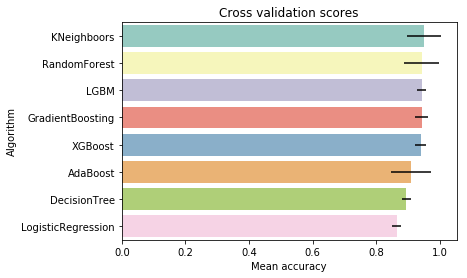

In [36]:
cv_score_check('accuracy',X_train,y_train) 

,CrossValMeans,CrossValerrors,Algorithm
2,0.989623,0.031132,RandomForest
3,0.989623,0.031132,GradientBoosting
6,0.988375,0.029737,XGBoost
0,0.988050,0.035849,DecisionTree
7,0.987736,0.036792,LGBM
1,0.986164,0.041509,AdaBoost
4,0.983025,0.045771,KNeighboors
5,0.886558,0.040542,LogisticRegression


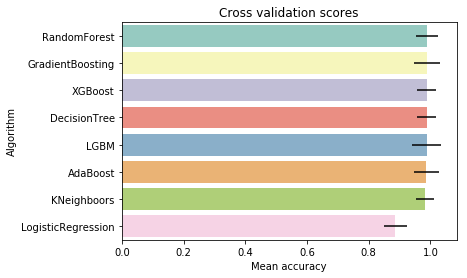

In [37]:
cv_score_check('accuracy',X_res,y_res)  #높은데 표준편차가 큼

## Accuarrcy
#### 기본 : KNN, RF, LGBM,GB,XGB ,  샘플링 : RF,GB,XGB,DT,LGBM
#### 공통 : RF,LGBM,GB,XGB

,CrossValMeans,CrossValerrors,Algorithm
7,0.873214,0.121494,LGBM
6,0.790939,0.266704,XGBoost
3,0.776521,0.249579,GradientBoosting
2,0.693618,0.257619,RandomForest
1,0.597817,0.192862,AdaBoost
0,0.542460,0.154511,DecisionTree
5,0.540344,0.332790,LogisticRegression
4,0.511772,0.200888,KNeighboors


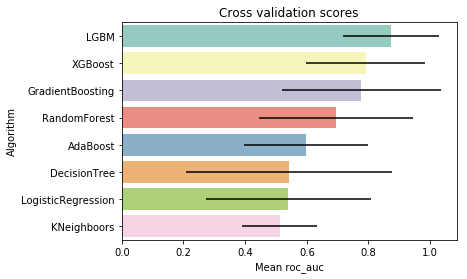

In [38]:
cv_score_check('roc_auc',X_train,y_train) 

,CrossValMeans,CrossValerrors,Algorithm
3,0.999592,0.001223,GradientBoosting
2,0.999371,0.001887,RandomForest
7,0.998916,0.003253,LGBM
6,0.998615,0.004155,XGBoost
0,0.988272,0.035185,DecisionTree
1,0.986420,0.040741,AdaBoost
4,0.982779,0.050787,KNeighboors
5,0.939449,0.051767,LogisticRegression


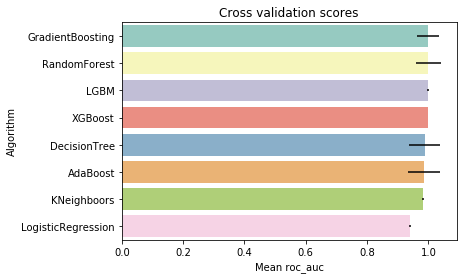

In [39]:
cv_score_check('roc_auc',X_res,y_res)  # roc_auc에선 압도적

##  ROC-AUC
#### 기본 : LGBM, XGB, GB  샘플링 : GB,RF,LGBM,XGB
#### 공통 : LGBM,XGB,GB( RF가 샘플링에서 너무 좋으므로 RF차용)

# 모델간 유사도 파악

In [40]:
pred=[]
for cf in classifiers:
    cf.fit(X_res,y_res)
    pred.append(cf.predict(X_test))
pred_df=pd.DataFrame(pred).T
pred_df.columns=["DecisionTree","AdaBoost",
"RandomForest","GradientBoosting","KNeighboors","LogisticRegression",'XGBoost','LGBM']
display(pred_df[['RandomForest','GradientBoosting','XGBoost','LGBM']].corr())

,RandomForest,GradientBoosting,XGBoost,LGBM
RandomForest,1.000000,0.569542,0.615362,0.435320
GradientBoosting,0.569542,1.000000,0.819548,0.570468
XGBoost,0.615362,0.819548,1.000000,0.778971
LGBM,0.435320,0.570468,0.778971,1.000000


####  상위 모델 간  상관관계 확인 , Boosting 류는 큰 꽤 높은 상관관계를 가지고 있다 ( 앙상블에 유의 ) 

# 튜닝

In [64]:
#튜닝
import scipy as sp
from scipy.stats import randint as sp_randint
import scipy.stats
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

In [65]:
RF=RandomForestClassifier()
GB=GradientBoostingClassifier()
XGB=XGBClassifier()
LGB=LGBMClassifier()

In [43]:
models=[RF,GB,XGB,LGB]

## RF

In [497]:
%%time
RF_param_grid = {'class_weight' :['balanced', 'balanced_subsample',None],
                 'criterion' : ['gini','entropy'],
                 'max_depth': [1, 2, 4, 8, 16, 32, 64, 100, 200],
                 'max_features':['log2',None,'auto'],
                 'n_estimators' : [10, 30, 60, 100]}

gsRF = GridSearchCV(RF,RF_param_grid, cv=kfold,verbose=2,n_jobs= -1)
gsRF.fit(X_res,y_res)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   33.9s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-1)]: Done 5816 tasks      | elapsed: 19.5min
[Parallel(n_jobs=-1)]: Done 6480 out of 6480 | elapsed: 22.3min finished


Wall time: 22min 20s


In [498]:
display(gsRF.best_estimator_)
display(gsRF.best_score_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=64, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

0.9949858978376684

In [66]:
RF_stack=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=64, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [67]:
RF_stack.fit(X_res,y_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=64, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [80]:
rf_feature=pd.Series(RF_stack.feature_importances_).sort_values(ascending=False).index.astype(int)

## GB

In [505]:
GB

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [512]:
%%time
gb_param_grid = {'learning_rate' :[0.01, 0.05, 0.1, 0.5, 1],
             'n_estimators' :[4, 8, 32, 64, 100],
                 'min_samples_split' : [0.1,0.3,0.6,2],
              'max_depth': [1,3,5,12],
              'min_samples_leaf' :[0.1,0.3,0.5,1],
              'max_features' : [20,40,60,None]
              }

gsGB = GridSearchCV(GB,gb_param_grid, cv=3,verbose=2,n_jobs= -1)
gsGB.fit(X_res,y_res)

Fitting 3 folds for each of 6400 candidates, totalling 19200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 344 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 774 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 1340 tasks      | elapsed:   34.9s
[Parallel(n_jobs=-1)]: Done 2000 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 2545 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 3214 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 3851 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 4939 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 6102 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 7359 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 9051 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 10113 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 11351 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 13398 tasks    

Wall time: 12min 58s


In [516]:
display(gsGB.best_estimator_)
display(gsGB.best_score_)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.5, loss='deviance', max_depth=5,
              max_features=20, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=0.6,
              min_weight_fraction_leaf=0.0, n_estimators=64,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

1.0

In [68]:
GB_stack=GradientBoostingClassifier(criterion='friedman_mse', init=None,
                       learning_rate=0.5, loss='deviance', max_depth=5,
                       max_features=20, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=0.6,
                       min_weight_fraction_leaf=0.0, n_estimators=64,
                       n_iter_no_change=None, presort='auto', random_state=None,
                       subsample=1.0, tol=0.0001, validation_fraction=0.1,
                       verbose=0, warm_start=False)

In [69]:
GB_stack.fit(X_res,y_res)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.5, loss='deviance', max_depth=5,
              max_features=20, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=0.6,
              min_weight_fraction_leaf=0.0, n_estimators=64,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [81]:
gb_feature=pd.Series(GB_stack.feature_importances_).sort_values(ascending=False).index.astype(int)

## XGB

In [514]:
%%time
xgb_param_grid = {'learning_rate' : [0.01,0.03,0.06,0.09],
              'n_estimators' : [50,100,150],
                  'booster' : ['dart','gbtree'],
              'max_depth': [3,5,8,12,20],
              'colsample_bytree' :[0.3,0.8,1],
              'gamma': [0,1,5] 
              }

gsXGB = GridSearchCV(XGB,xgb_param_grid, cv=kfold,verbose=2,n_jobs= -1)
gsXGB.fit(X_res,y_res)

Fitting 10 folds for each of 1080 candidates, totalling 10800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 20.8min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 29.5min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 39.4min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 51.0min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed: 64.1min
[Parallel(n_jobs=-1)]: Done 5816 tasks      | elapsed: 75.2min
[Parallel(n_jobs=-1)]: Done 6829 tasks      | elapsed: 81.7min
[Parallel(n_jobs=-1)]: Done 7922 tasks      | elapsed: 130.8min
[Parallel(n_jobs=-1)]: Done 9097 tasks      | 

Wall time: 2h 48min 28s


In [526]:
display(gsXGB.best_estimator_)
display(gsXGB.best_score_)

XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.09,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=150, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

0.9934189909119399

In [70]:
XGB_stack=XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.09,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=150, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [71]:
XGB_stack.fit(X_res,y_res)

XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.09,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=150, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [52]:
XGB_stack.feature_importances_ # dart에선 불가

AttributeError: Feature importance is not defined for Booster type dart

## LGBM

In [490]:
LGB=LGBMClassifier(n_jobs=-1)

In [518]:
%%time
LGB_param_grid = {"boosting_type" : ['gbdt','dart'],
                  'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}
rsLGB = RandomizedSearchCV(LGB, param_distributions=LGB_param_grid, n_iter=10000, random_state=random_state,verbose=1,n_jobs=-1)
rsLGB.fit(X_res, y_res)
print('Best score reached: {} with params: {} '.format(rsLGB.best_score_, rsLGB.best_params_))

Fitting 3 folds for each of 10000 candidates, totalling 30000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   28.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   47.1s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 11234 tasks      |

Best score reached: 0.9974929489188342 with params: {'boosting_type': 'gbdt', 'colsample_bytree': 0.9788290104601244, 'min_child_samples': 131, 'min_child_weight': 0.01, 'reg_alpha': 0.1, 'reg_lambda': 0.1, 'subsample': 0.35982180753740106} 
Wall time: 36min 28s


In [527]:
display(rsLGB.best_score_)
display(rsLGB.best_params_)

0.9974929489188342

{'boosting_type': 'gbdt',
 'colsample_bytree': 0.9788290104601244,
 'min_child_samples': 131,
 'min_child_weight': 0.01,
 'reg_alpha': 0.1,
 'reg_lambda': 0.1,
 'subsample': 0.35982180753740106}

In [72]:
LGB_stack=LGBMClassifier(
    boosting_type = 'gbdt',
    colsample_bytree=  0.9788290104601244,
    min_child_samples= 131,
    min_child_weight= 0.01,
    reg_alpha= 0.1,
    reg_lambda= 0.1,
    subsample= 0.35982180753740106)

In [73]:
LGB_stack.fit(X_res,y_res)

LGBMClassifier(boosting_type='gbdt', class_weight=None,
        colsample_bytree=0.9788290104601244, importance_type='split',
        learning_rate=0.1, max_depth=-1, min_child_samples=131,
        min_child_weight=0.01, min_split_gain=0.0, n_estimators=100,
        n_jobs=-1, num_leaves=31, objective=None, random_state=None,
        reg_alpha=0.1, reg_lambda=0.1, silent=True,
        subsample=0.35982180753740106, subsample_for_bin=200000,
        subsample_freq=0)

In [82]:
lgb_feature=pd.Series(LGB_stack.feature_importances_).sort_values(ascending=False).index.astype(int)

## 데이터 분할 선택 시도

In [84]:
feature_rank=pd.concat([pd.Series(rf_feature),pd.Series(gb_feature),pd.Series(lgb_feature)],axis=1)

In [85]:
feature_rank.columns=['RF','GB','LGB']

In [86]:
important=feature_rank.iloc[:20,].values.flatten()

In [87]:
important=pd.Series(important).unique()

In [88]:
X_res2=X_res.iloc[:,important]
X_cut_test=X_test.iloc[:,important]

In [89]:
#RF_stack.fit(X_res2,y_res)
#GB_stack.fit(X_res2,y_res)
#LGB_stack.fit(X_res2,y_res)

In [90]:
#RF_stack.predict(X_cut_test)

In [91]:
rf_list=feature_rank['RF'][:40]
gb_list=feature_rank['GB'][:20]
lgb_list=feature_rank['LGB'][:20]

In [92]:
rfdf=X_res.iloc[:,rf_list]
rftest=X_test.iloc[:,rf_list]

gbdf=X_res.iloc[:,gb_list]
gbtest=X_test.iloc[:,gb_list]

lgbdf=X_res.iloc[:,lgb_list]
lgbtest=X_test.iloc[:,lgb_list]

In [93]:
RF_stack.fit(rfdf,y_res)
GB_stack.fit(gbdf,y_res)
LGB_stack.fit(lgbdf,y_res)

LGBMClassifier(boosting_type='gbdt', class_weight=None,
        colsample_bytree=0.9788290104601244, importance_type='split',
        learning_rate=0.1, max_depth=-1, min_child_samples=131,
        min_child_weight=0.01, min_split_gain=0.0, n_estimators=100,
        n_jobs=-1, num_leaves=31, objective=None, random_state=None,
        reg_alpha=0.1, reg_lambda=0.1, silent=True,
        subsample=0.35982180753740106, subsample_for_bin=200000,
        subsample_freq=0)

In [94]:
RF_stack.predict_proba(rftest)[:,1]

array([1. , 0.8, 0.5, 1. , 1. , 1. , 1. , 1. , 1. , 1. , 0.7, 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 0.4, 1. , 0.5, 1. , 0.8, 1. , 1. , 1. ,
       1. , 0.5, 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 0. , 1. , 1. , 1. , 1. , 0.3, 1. , 1. , 0.9, 1. , 1. , 1. ,
       0.2, 1. , 1. , 1. , 1. , 1. , 0.3, 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 0.9, 1. , 1. , 1. , 0.9, 0.9, 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 0.6, 0.5, 0.8, 1. , 1. , 1. , 0.7, 0.8, 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 0.7, 1. , 1. , 1. , 1. ,
       0.6, 1. , 0.9, 1. , 1. , 1. , 1. , 1. , 0.7, 0.7, 1. , 1. , 1. ,
       1. , 1. , 1. , 0.3, 1. , 0. , 0.5, 0.5, 1. , 0.6])

In [96]:
accuracy_score(GB_stack.predict(gbdf),y_res)

1.0

In [97]:
RF_prob=RF_stack.predict_proba(rftest)[:,1]
GB_prob=GB_stack.predict_proba(gbtest)[:,1]
LGB_prob=LGB_stack.predict_proba(lgbtest)[:,1]

In [98]:
a=RF_prob*0.2
b=GB_prob*0.6
c=LGB_prob*0.2
d=a+b+c
d[d<=0.8]=0
d[d>=0.8]=1
# PRED값, LOSS봐가면서 확인 이 값이 제출값

In [99]:
pred=GB_prob

In [100]:
pred=d

# Stacking

In [104]:
stack_clf=[RF_stack,GB_stack,XGB_stack,LGB_stack]

In [105]:
from sklearn.metrics import accuracy_score

In [106]:
from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2,y_test2 = train_test_split(X_res,y_res, test_size=0.3, random_state=random_state)

In [107]:
stack_clf[0]

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=64, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [108]:
8*(20/81)

1.9753086419753085

In [109]:
meta_GB=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.5, loss='deviance', max_depth=5,
              max_features=2, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=0.6,
              min_weight_fraction_leaf=0.0, n_estimators=64,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)
#Gradient Boosting이 loss 제일 적게 나와서 메타모델로 사용

In [110]:
stack_clf

[RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
             max_depth=64, max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False),
 GradientBoostingClassifier(criterion='friedman_mse', init=None,
               learning_rate=0.5, loss='deviance', max_depth=5,
               max_features=20, max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=1, min_samples_split=0.6,
               min_weight_fraction_leaf=0.0, n_estimators=64,
               n_iter_no_change=None, presort='auto', random_state=None,
               subsample=1.0, tol=0.0001, validation_fraction=0.1,
               verbose=0, warm_start=False),
 XGBClassifier(

In [111]:
%%time
from vecstack import stacking
S_train, S_test = stacking(stack_clf[1:],                     # list of models
                           X_train2, y_train2, X_test2,   # data
                           regression=False,           # classification task (if you need 
                                                       #     regression - set to True)
                           needs_proba=True,          # predict class labels (if you need 
                                                       #     probabilities - set to True) 
                           metric=None,      # metric: callable
                           n_folds=10,                  # number of folds
                           stratified=True,            # stratified split for folds
                           shuffle=True,               # shuffle the data
                           random_state=random_state,             # ensure reproducibility
                           verbose=2)                  # print all info

meta_model = meta_GB.fit(S_train, y_train2)
display(accuracy_score(y_test2, meta_GB.predict(S_test)))
#Gradient Boosting이 loss 제일 적게 나와서 메타모델로 사용
# + LGBM이 LOSS가 크고 변동도 심해서 제외 시도

task:         [classification]
n_classes:    [2]
metric:       [log_loss]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [GradientBoostingClassifier]
    fold  0:  [0.00251655]
    fold  1:  [0.02408842]
    fold  2:  [0.00466874]
    fold  3:  [0.00443416]
    fold  4:  [0.01440617]
    fold  5:  [0.00503444]
    fold  6:  [0.00285472]
    fold  7:  [0.01682255]
    fold  8:  [0.00522641]
    fold  9:  [0.00230709]
    ----
    MEAN:     [0.00823593] + [0.00711623]
    FULL:     [0.00823865]

model  1:     [XGBClassifier]
    fold  0:  [0.00186799]
    fold  1:  [0.03830202]
    fold  2:  [0.00253037]
    fold  3:  [0.01299204]
    fold  4:  [0.01447978]
    fold  5:  [0.00381442]
    fold  6:  [0.00281507]
    fold  7:  [0.03729709]
    fold  8:  [0.01475897]
    fold  9:  [0.00331852]
    ----
    MEAN:     [0.01321763] + [0.01323149]
    FULL:     [0.01320821]

model  2:     [LGBMClassifier]
    fold  0:  [0.00340010]
    fold  1:  [0.01656969]
    fold  2:  [0.00743

0.9979123173277662

Wall time: 44.7 s


In [112]:
%%time
from vecstack import stacking
S_train, S_test = stacking(stack_clf[1:],                     # list of models
                           X_train2, y_train2, X_test2,   # data
                           regression=False,           # classification task (if you need 
                                                       #     regression - set to True)
                           needs_proba=True,          # predict class labels (if you need 
                                                       #     probabilities - set to True) 
                           metric=None,      # metric: callable
                           n_folds=10,                  # number of folds
                           stratified=True,            # stratified split for folds
                           shuffle=True,               # shuffle the data
                           random_state=random_state,             # ensure reproducibility
                           verbose=2)                  # print all info

meta_model = meta_GB.fit(S_train, y_train2)
display(accuracy_score(y_test2, meta_GB.predict(S_test)))
#Gradient Boosting이 loss 제일 적게 나와서 메타모델로 사용
# + LGBM이 LOSS가 크고 변동도 심해서 제외 시도

task:         [classification]
n_classes:    [2]
metric:       [log_loss]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [GradientBoostingClassifier]
    fold  0:  [0.00307698]
    fold  1:  [0.01502805]
    fold  2:  [0.00331364]
    fold  3:  [0.00713222]
    fold  4:  [0.00726791]
    fold  5:  [0.00520278]
    fold  6:  [0.00346725]
    fold  7:  [0.02699599]
    fold  8:  [0.00349445]
    fold  9:  [0.00314892]
    ----
    MEAN:     [0.00781282] + [0.00727723]
    FULL:     [0.00780563]

model  1:     [XGBClassifier]
    fold  0:  [0.00186799]
    fold  1:  [0.03830202]
    fold  2:  [0.00253037]
    fold  3:  [0.01299204]
    fold  4:  [0.01447978]
    fold  5:  [0.00381442]
    fold  6:  [0.00281507]
    fold  7:  [0.03729709]
    fold  8:  [0.01475897]
    fold  9:  [0.00331852]
    ----
    MEAN:     [0.01321763] + [0.01323149]
    FULL:     [0.01320821]

model  2:     [LGBMClassifier]
    fold  0:  [0.00340010]
    fold  1:  [0.01656969]
    fold  2:  [0.00743

0.9968684759916493

Wall time: 50.5 s


In [113]:
%%time
from vecstack import stacking
S_train, S_test = stacking([GB_stack,XGB_stack],                     # list of models
                           gbdf, y_res, gbtest,   # data
                           regression=False,           # classification task (if you need 
                                                       #     regression - set to True)
                           needs_proba=True,          # predict class labels (if you need 
                                                       #     probabilities - set to True) 
                           metric=None,      # metric: callable
                           n_folds=10,                  # number of folds
                           stratified=True,            # stratified split for folds
                           shuffle=True,               # shuffle the data
                           random_state=random_state,             # ensure reproducibility
                           verbose=2)                  # print all info

meta_model = meta_GB.fit(S_train, y_res)
#Gradient Boosting이 loss 제일 적게 나와서 메타모델로 사용
# + LGBM이 LOSS가 크고 변동도 심해서 제외 시도
# + 실제 값 예측

task:         [classification]
n_classes:    [2]
metric:       [log_loss]
mode:         [oof_pred_bag]
n_models:     [2]

model  0:     [GradientBoostingClassifier]
    fold  0:  [0.00515270]
    fold  1:  [0.01483063]
    fold  2:  [0.00371005]
    fold  3:  [0.00308346]
    fold  4:  [0.00258384]
    fold  5:  [0.00259799]
    fold  6:  [0.00483948]
    fold  7:  [0.00560203]
    fold  8:  [0.00447358]
    fold  9:  [0.00373667]
    ----
    MEAN:     [0.00506104] + [0.00340343]
    FULL:     [0.00506281]

model  1:     [XGBClassifier]
    fold  0:  [0.00489372]
    fold  1:  [0.00299520]
    fold  2:  [0.00265667]
    fold  3:  [0.00229540]
    fold  4:  [0.00184527]
    fold  5:  [0.00222083]
    fold  6:  [0.00339441]
    fold  7:  [0.00368340]
    fold  8:  [0.00269404]
    fold  9:  [0.00458762]
    ----
    MEAN:     [0.00312666] + [0.00096007]
    FULL:     [0.00312578]

Wall time: 32.3 s


In [114]:
pred=meta_model.predict(S_test)

In [115]:
pred=meta_model.predict_proba(S_test)[:,1]

In [116]:
pred[pred<0.7]=0
pred[pred>=0.7]=1

In [117]:
test_id[pd.Series(pred)[pd.Series(pred)==0].index]

array([ 24,  48, 123, 165, 254, 258, 341, 413, 424, 425, 429], dtype=int64)

In [118]:
predict=pd.concat([pd.Series(test_id),pd.Series(pred)],axis=1)

In [119]:
predict.columns=['inst_id','OC']

In [120]:
predict.to_csv('과제제출1.csv',index=False)

In [121]:
# STACKING류는 90점대를 넘지 못했고
# GB모델을 가중치 줘가면서 Voting한게 가장 성능이 좋았다 